In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
netflix= pd.read_csv("netflix_titles.csv")

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.shape

(8807, 12)

In [ ]:
content_types = netflix['type'].value_counts()
content_types

Movie      6131
TV Show    2676
Name: type, dtype: int64

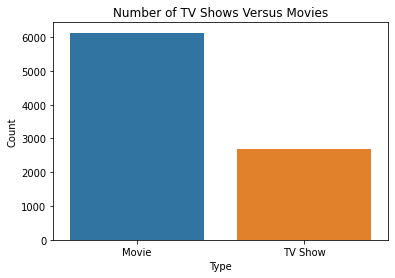

In [ ]:
sns.barplot(x=content_types.index, y=content_types.values)  # Also you can use `sns.countplot`
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of TV Shows Versus Movies')
plt.show()

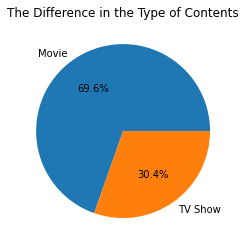

In [ ]:
plt.pie(x=content_types.values, labels=content_types.index,
        autopct='%.1f%%')
plt.title('The Difference in the Type of Contents')
plt.show()

In [ ]:
#Countries with the highest amount of production
top_producing_countries = (
    netflix['country']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)
top_producing_countries

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

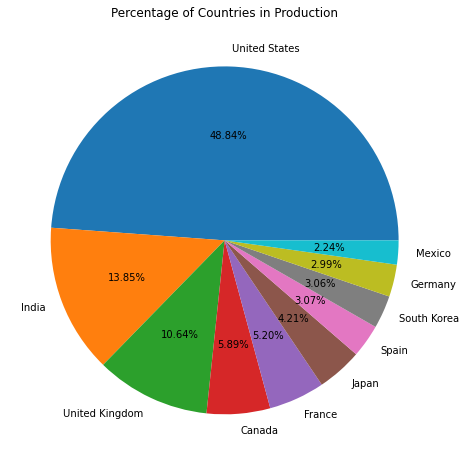

In [ ]:
plt.figure(figsize=(9, 8))
plt.pie(x=top_producing_countries.values, labels=top_producing_countries.index, autopct='%.2f%%')
plt.title('Percentage of Countries in Production')
plt.show()

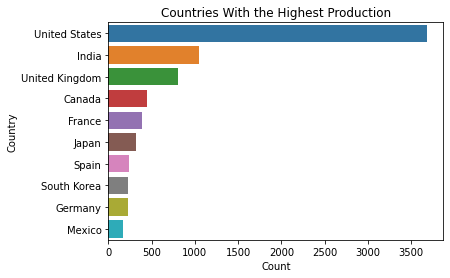

In [ ]:
sns.barplot(x=top_producing_countries.values, y=top_producing_countries.index)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Countries With the Highest Production')
plt.show()

In [ ]:
#different types of rating 
most_used_ratings = (
    netflix['rating']
    .value_counts()
    .head(10)
)
most_used_ratings

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

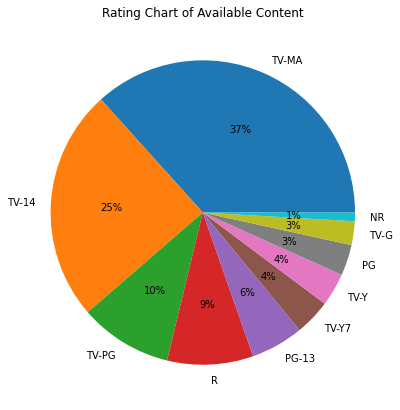

In [ ]:
plt.figure(figsize=(8, 7))
plt.pie(x=most_used_ratings.values, labels=most_used_ratings.index, autopct='%.0f%%')
plt.title('Rating Chart of Available Content')
plt.show()

In [ ]:
#most commonly produced genres
most_produced_genres = (
  netflix['listed_in']
  .str.split(', ')
  .explode()
  .value_counts()
  .head(30)
)
most_produced_genres

International Movies         2752
Dramas                       2427
Comedies                     1674
International TV Shows       1351
Documentaries                 869
Action & Adventure            859
TV Dramas                     763
Independent Movies            756
Children & Family Movies      641
Romantic Movies               616
TV Comedies                   581
Thrillers                     577
Crime TV Shows                470
Kids' TV                      451
Docuseries                    395
Music & Musicals              375
Romantic TV Shows             370
Horror Movies                 357
Stand-Up Comedy               343
Reality TV                    255
British TV Shows              253
Sci-Fi & Fantasy              243
Sports Movies                 219
Anime Series                  176
Spanish-Language TV Shows     174
TV Action & Adventure         168
Korean TV Shows               151
Classic Movies                116
LGBTQ Movies                  102
TV Mysteries  

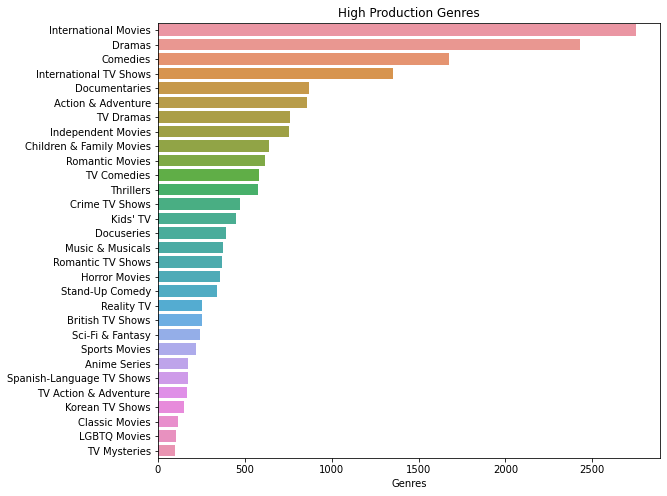

In [ ]:
plt.figure(figsize=(9, 8))
sns.barplot(x=most_produced_geners.values, y=most_produced_geners.index)
plt.xlabel('Genres')
plt.title('High Production Genres')
plt.show()

In [ ]:
#Month which has added most content to netflix
months_name = (
    pd.to_datetime(netflix['date_added'])
    .dt.month_name()
)
months_name

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: date_added, Length: 8807, dtype: object

In [ ]:
content_type_and_upload_month = (
    pd.concat([netflix['type'], months_name], axis=1)
    .rename(columns={'date_added': 'month_added'})
    .value_counts()
)
content_type_and_upload_month



type     month_added
Movie    July           565
         April          550
         December       547
         January        546
         October        545
         March          529
         September      519
         August         519
         November       498
         June           492
         May            439
         February       382
TV Show  December       266
         July           262
         September      251
         August         236
         June           236
         October        215
         April          214
         March          213
         November       207
         May            193
         January        192
         February       181
dtype: int64

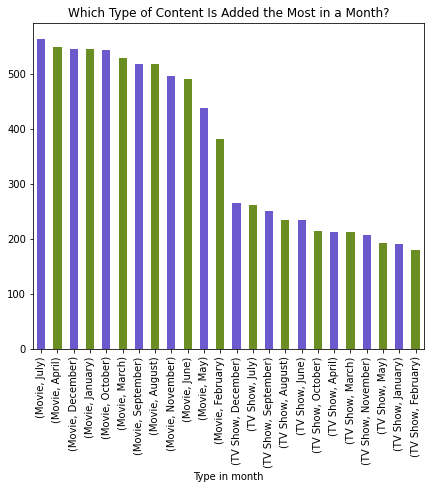

In [ ]:
plt.figure(figsize=(7, 6))
content_type_and_upload_month.plot(kind='bar', stacked=True, color=['slateblue', 'olivedrab'])
plt.xlabel('Type in month')
plt.title('Which Type of Content Is Added the Most in a Month?')
plt.show()

In [ ]:
content_type_and_upload_month_df = ( 
    content_type_and_upload_month
    .reset_index()
    .rename(columns={0: 'count'})
)
content_type_and_upload_month_df

,type,month_added,count
0,Movie,July,565
1,Movie,April,550
2,Movie,December,547
3,Movie,January,546
4,Movie,October,545
5,Movie,March,529
6,Movie,September,519
7,Movie,August,519
8,Movie,November,498
9,Movie,June,492


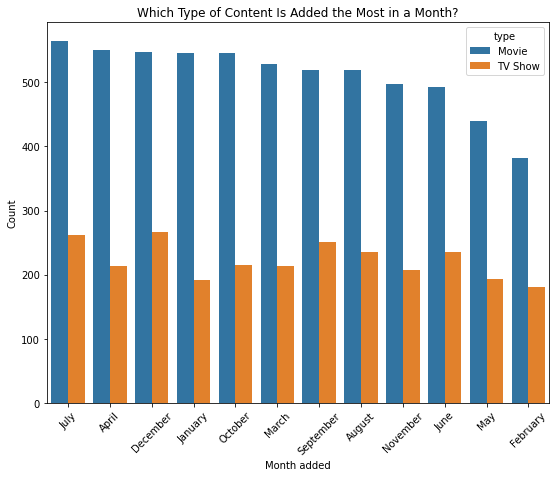

In [ ]:
plt.figure(figsize=(9, 7))
sns.barplot(data=content_type_and_upload_month_df, x='month_added', y='count', hue='type')
plt.xticks(rotation=45)
plt.xlabel('Month added')
plt.ylabel('Count')
plt.title('Which Type of Content Is Added the Most in a Month?')
plt.show()

In [ ]:
top_release_years = (
    netflix['release_year']
    .value_counts()
    .head(15)
)
top_release_years

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: release_year, dtype: int64

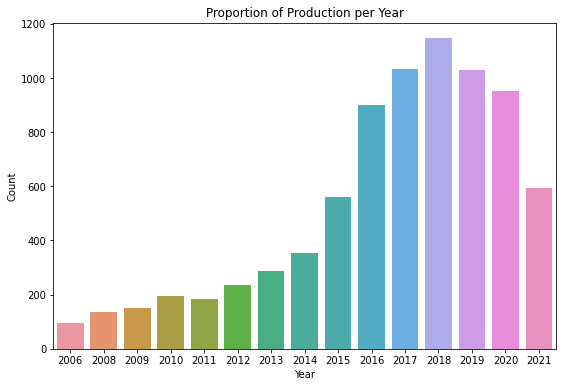

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(x=top_release_years.index, y=top_release_years.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Proportion of Production per Year')  
plt.show()